# Import Data

In [1]:
#import DataFetcher class from file heart_data.py
import DataFetcher #importing the file DataFetcher.py from the folder data
data_fetcher = DataFetcher.DataFetcher("C:\\Users\\kruth\\OneDrive\\Desktop\\Cardiac_Events_ML\\preprocessing\\final_dataset.csv")
X_train = data_fetcher.get_X_train()
X_test = data_fetcher.get_X_test()
y_train = data_fetcher.get_y_train()
y_test = data_fetcher.get_y_test()
features = data_fetcher.get_features()
target_names = data_fetcher.get_target_names()
X = data_fetcher.get_X()
y = data_fetcher.get_y()


------class run complete------



# Initial Model

In [2]:
#train ada boost model
from sklearn.ensemble import AdaBoostClassifier
ab_1 = AdaBoostClassifier(random_state=42)
ab_1.fit(X_train, y_train)

#predict
y_pred_1 = ab_1.predict(X_test)

#---------------------------------Evaluating the model---------------------------------

# Evaluate the model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("\n----------Ada Boost Metrics----------\n")
print("Accuracy:", accuracy_score(y_test, y_pred_1))
print("Precision:", precision_score(y_test, y_pred_1))
print("Recall:", recall_score(y_test, y_pred_1))
print("F1 Score:", f1_score(y_test, y_pred_1))
#meaning of accuracy score: 0.9 means 90% of the predictions are correct

#classification_report
print("\n----------Classification Report----------\n")
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_1)
print(cr)


----------Ada Boost Metrics----------

Accuracy: 0.7833333333333333
Precision: 0.8709677419354839
Recall: 0.75
F1 Score: 0.8059701492537312

----------Classification Report----------

              precision    recall  f1-score   support

           0       0.69      0.83      0.75        24
           1       0.87      0.75      0.81        36

    accuracy                           0.78        60
   macro avg       0.78      0.79      0.78        60
weighted avg       0.80      0.78      0.79        60



# Grid Search

In [3]:
# perfrom grid search
# 30 secs
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
                'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                'algorithm': ['SAMME', 'SAMME.R'],
                }

grid = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid, refit = True, verbose = 3, n_jobs=-1, cv=3)

# fitting the model for grid search
ab = grid.fit(X_train, y_train)

# print best parameter, best estimator and best score
print('best params = ', ab.best_params_)
print('best estimator = ', ab.best_estimator_)
print('best score = ', ab.best_score_)


Fitting 3 folds for each of 154 candidates, totalling 462 fits
best params =  {'algorithm': 'SAMME.R', 'learning_rate': 0.01, 'n_estimators': 600}
best estimator =  AdaBoostClassifier(learning_rate=0.01, n_estimators=600, random_state=42)
best score =  0.8285337552742617


# Final Model

In [6]:
#AdaBoostClassifier(learning_rate=0.01, n_estimators=600, random_state=42)

#predict with best estimator
ab = AdaBoostClassifier(learning_rate=0.01, n_estimators=600, random_state=42).fit(X_train, y_train)
y_pred = ab.predict(X_test)


#---------------------------------Evaluating the model---------------------------------

# Evaluate the model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("\n----------Final RF Metrics----------\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
#meaning of accuracy score: 0.9 means 90% of the predictions are correct

#classification_report
print("\n----------Classification Report----------\n")
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)


----------Final RF Metrics----------

Accuracy: 0.9333333333333333
Precision: 0.9444444444444444
Recall: 0.9444444444444444
F1 Score: 0.9444444444444444

----------Classification Report----------

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        24
           1       0.94      0.94      0.94        36

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60



## Confusion Matrix

[[22  2]
 [ 2 34]]


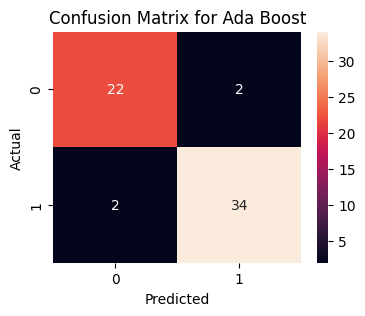

In [18]:
#get the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#visualize the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
axes, fig = plt.subplots(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d") #fmt="d" means the values in the matrix are integers  
#annot=True means the values in the matrix are displayed
plt.title("Confusion Matrix for Ada Boost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Cross Validation

In [10]:
#cross validation for 10 folds
# 5 mins
from sklearn.model_selection import cross_val_score
scores = cross_val_score(ab, X_train, y_train, cv=10, scoring="f1", n_jobs=-1) #scoring can be accuracy, precision, recall, f1, roc_auc, etc
#get the scores for each fold
for i in range(10):
    print("Fold", i, ":", scores[i])
    
#get the mean of the scores
print("\nMean:", scores.mean())
#get the standard deviation of the scores
print("Standard Deviation:", scores.std()) #standard deviation is calculated for the scores of each fold
#A low standard deviation indicates that the model is consistent in its performance across different subsets of the data, which is a good sign.
#get the variance of the scores
print("Variance:", scores.var()) #variance is calculated for the scores of each fold
#A low variance indicates that the model is consistent in its performance across different subsets of the data, which is a good sign.

Fold 0 : 0.8571428571428571
Fold 1 : 0.8
Fold 2 : 0.8333333333333333
Fold 3 : 0.8571428571428571
Fold 4 : 0.8
Fold 5 : 0.7692307692307693
Fold 6 : 0.8666666666666666
Fold 7 : 0.8799999999999999
Fold 8 : 0.8695652173913043
Fold 9 : 0.75

Mean: 0.8283081700907788
Standard Deviation: 0.043311324032403425
Variance: 0.0018758707894398464


## ROC

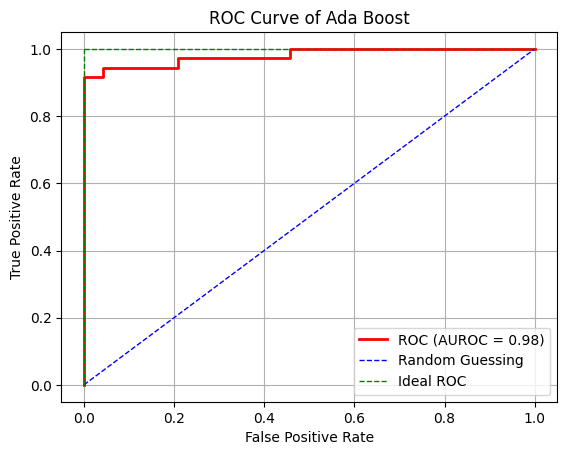

In [11]:
#plot roc curve for the model
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#plot the roc curve
y_pred_proba = ab.predict_proba(X_test)[::,1] #get the probability of the positive class. [::,1] means get the second column of the array
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba) # _ is a placeholder for the threshold values
auc = roc_auc_score(y_test, y_pred_proba).round(2) #round the auc score to 2 decimal places
plt.plot(fpr,tpr,'r', label="ROC (AUROC = %0.2f)" % auc, linewidth = 2) 

#plot the random guessing line and the ideal roc line
plt.plot([0,1],[0,1],"b--", linewidth = 1, label = "Random Guessing")
plt.plot([0,1],[1,1], "g--", linewidth = 1, label = "Ideal ROC")
plt.plot([0,0],[0,1], "g--", linewidth = 1)

#set up the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve of Ada Boost")
plt.legend(loc="best")
plt.grid(True)
plt.show()

## PRC

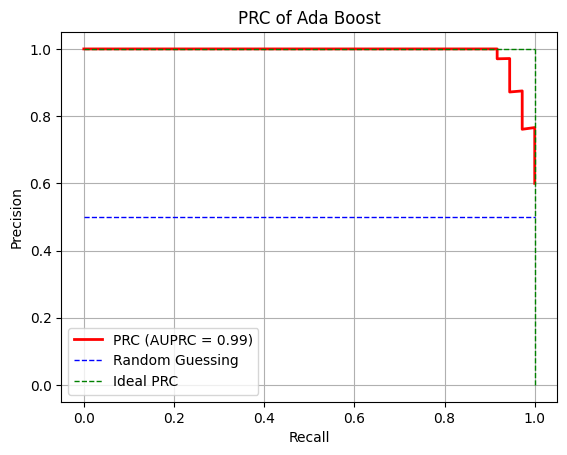

In [12]:
# plot PRC for the model
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

#plot the PRC curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)  # _ is a placeholder for the threshold values
average_precision = average_precision_score(y_test, y_pred_proba).round(2)
plt.plot(recall, precision,'r', label="PRC (AUPRC = %0.2f)" % average_precision, linewidth = 2)
#average precision is the area under the PRC curve

#plot the ideal PRC curve and random guessing PRC curve
plt.plot([0,1],[0.5,0.5],"b--", linewidth = 1, label = "Random Guessing")
plt.plot([0,1],[1,1], "g--", linewidth = 1, label = "Ideal PRC")
plt.plot([1,1],[0,1], "g--", linewidth = 1)

#set up the plot
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PRC of Ada Boost")
plt.legend(loc="best")
plt.grid(True)
plt.show()

## Learning Curve

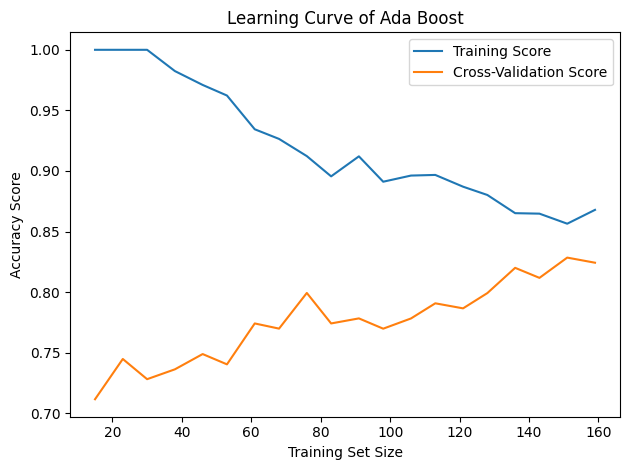

In [17]:
#plot the learning curve for the model
#use Recall as the scoring metric because the model should idealy minimize the number of false negatives.
from sklearn.model_selection import learning_curve
import numpy as np
train_sizes, train_scores, test_scores = learning_curve(ab, X_train, y_train, cv = 3, scoring="accuracy",n_jobs=-1, train_sizes=np.linspace(0.1,1.0,20))
#train_sizes: the proportion of the training set to include in the learning curve.
#train_sizes=np.linspace(0.1,1.0,4) means the training set size will be 10%, 40%, 70%, and 100% of the training set.
#train_scores: the scores for each training subset
#test_scores: the scores for each testing subset

#plot the learning curve
import matplotlib.pyplot as plt
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training Score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Cross-Validation Score")
plt.title("Learning Curve of Ada Boost")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.tight_layout() 
plt.show()